

<h1 align = "center">Convection-diffusion en dimension 2</h1>
<center>Fan JIANG:   fan.jiang@polytechnique.edu</center>


# INTRODUCTION

L’équation de convection diffusion nous permet de modéliser la dispersion simplement. Ce projet s’adresse à l’étude de la dispersion d’un produit chimique dans un fleuve en observant les différences d’évolution de la solution d’une équation de convection-diffusion lorsque le milieu est modélisé par compact de dimension 1 ou 2.

Nous modéliserons l’évolution de la concentration du produit chimique $u = u(t,x)$ au temps t et à la position $x \in \Bbb{R}^d, d = 1,2$, par une équation de convection-diffusion:

$$
\begin{cases}
\frac {\partial u} {\partial t} + V\cdot \nabla u - \nu\Delta u = f\\
{u\mid}_{t=0} = u_0
\end{cases}
\tag{1}
$$

Ici $V$ est la vitesse de convection, représentant la vitesse du courant et qui pourrait donc dépendre de la position et du temps, $\nu$ est le coefficient de diffusion, $f$ est la source et $u_0$ est la concentration initiale.

Nous allons appliquer des schémas aux différences finies pour simuler l’évolution de la concentration du produit chimique déversé dans le fleuve.

# 1 Évolution de la concentration dans le fleuve unidimensionnel

Afin d’observer le comportement de différents schémas, nous étudions d'abord l’équation de convection.

## 1.1 Équation de convection uni-dimensionnelle

En supposant que $\nu = 0,\ f = 0$ et $V > 0$, nous obtenons alors l’équation de convection:

$$
\begin{cases}
\frac {\partial u} {\partial t}(t,x) + V\frac {\partial u} {\partial x}(t,x) = 0, &\forall x \in \Bbb{R}, \forall t >0\\
{u\mid}_{t=0} = u_0, &\forall x \in \Bbb{R}
\end{cases}\tag{2}$$

Ici nous avons bien un problème de Cauchy homogène. Et sa solution exacte est :

$$
u(t,x) = u_0(x - Vt)
$$

Nous supposons que $u_0$ est de class $C^1$ sur $\Bbb{R}$. Dans ce cas nous pouvons résoudre explicitement l'équation $(2)$. Nous pouvons comparer les solutions explicites avec des résolutions numériques obtenues par différences finies. Pour résoudre numériquement cette équation, nous allons nous borner à un intervalle d’espace $[0,L]$ et de temps $[0,T]$, avec une condition initiale à support dans $[0, L]$. Nous notons alors, 

- $\Delta t$ le pas de discrétisation en temps;
- $\Delta x$ le pas de discrétisation en espace;
- $N = \frac {L}{\Delta x}-1$, la taille de la maille;
- $t^n = n\Delta t$ et $x_j = j\Delta x$ les coordonnées des points de la maille;
- $u^n_j$ l’approximation de $u(t^n, x_j)$;
- $U^n = (u^n_j)_{1≤j≤N}$, le vecteur approchant $u(t^n,·)$.

Nous imposons dans un premier temps les conditions au bord de Dirichlet $u^n_0 = u^n_{N+1} = 0$ pour tout $n \in \Bbb{N}$.

Dans les questions Q1 à Q3, nous pourrons accomplir les applications numériques avec $L = 50, T = 25, V = 1, \Delta x = 0.1, \Delta t = 0.025$ et la condition initiale $u_0 = f_{x_0,\sigma}$ pour

$$
f_{x_0,\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}\rm{exp}\left(-\frac{(x-x_0)^2}{2{\sigma}^2}\right)
\tag{3}
$$

avec $x_0 = 20, \sigma = 1$.







### Q1 

L’expression du schéma explicite centré:

$$
\frac{u_j^{n+1}-u_j^n}{\Delta t} + V\frac{u_{j+1}^n-u_{j-1}^n}{2\Delta x} = 0
$$

Par le schéma explicite au dessus, nous avons

$$
u_j^{n+1} = u_j^n - \frac{V\Delta t}{2\Delta x}(u_{j+1}^{n} - u_{j-1}^{n}),  \forall n \in \Bbb{N}
$$

Nous pouvons réécrire cette relation sous la forme du vecteur $U^n$, et nous avons alors

$$
U^{n+1} = (I_N - V\Delta t K_c)U^n,  \forall n \in \Bbb{N},
$$

avec la matrice $K_c \in M^{N\times N}$ égale à

$$
\frac{1}{2\Delta x}\left[\begin{array}{ccccc}
    0 & 1 & & & \Huge{0}\\
    -1 & 0 & 1\\
          & \ldots & \ldots\\
          & & \ldots & \ldots\\
          & & -1 & 0 & 1\\
\Huge{0} & & & -1 & 0
\end{array}\right]
$$


Selons la figure ci-dessous, la solution numérique ne converge pas au cours du temps. Donc, nous pouvons conclure que le schéma explicite centré n'est pas stable dans ce cas.
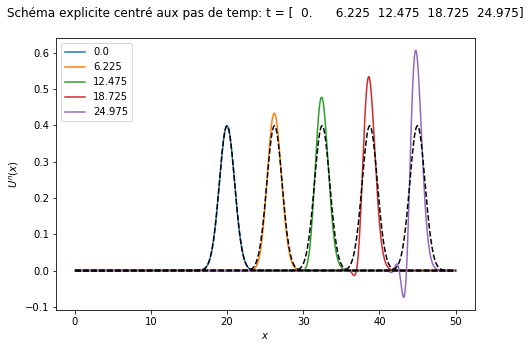


### Q2

L’expression du schéma explicite decentré amont:

$$
\frac{u_j^{n+1}-u_j^n}{\Delta t} + V\frac{u_{j}^n-u_{j-1}^n}{\Delta x} = 0
$$

Nous démarrons par la même procédure que Q1

$$
u_j^{n+1} = u_j^n - \frac{V\Delta t}{\Delta x}(u_{j}^{n} - u_{j-1}^{n}),  \forall n \in \Bbb{N}
$$

Nous pouvons réécrire cette relation sous la forme du vecteur $U^n$, et nous avons alors

$$
U^{n+1} = (I_N - V\Delta t K_d)U^n,  \forall n \in \Bbb{N}
$$

Avec la matrice $K_d \in M^{N\times N}$ égale à

$$
\frac{1}{\Delta x}\left[\begin{array}{ccccc}
    1 & 0 & & & \Huge{0}\\
    -1 & 1 & 0\\
          & \ldots & \ldots\\
          & & \ldots & \ldots\\
          & & -1 & 1 & 0\\
\Huge{0} & & & -1 & 1
\end{array}\right]
$$

Nous introduisons le vecteur erreur $e^n \in \Bbb{R}^N$ de composantes $e_j^n=U_j^n-\overline{U}_j^n$ pour tout $1\leq j \leq N$, où $\overline{U}^n = (\overline{U}_j^n)_{1\leq j \leq N} = (u(t^n, x_j))_{1\leq j \leq N}\in \Bbb{R}^N$($u$ est la solution exacte du problème$(2)$). Et il est facile de demontrer que 

$$
e^{n+1} = (I_N - V\Delta t K_d)e^n - \Delta t\eta^n
$$

Avec $\eta^n$, le vecteur erreur de troncature dont les composantes s'écrivent comme 

$$
\eta^n_j = \frac{\overline{U}_j^{n+1}-\overline{U}_j^{n}}{\Delta t} + \frac{V}{\Delta x}(\overline{U}_j^{n}-\overline{U}_{j-1}^{n})
$$

En appliquant les formules de Taylor, nous obtenons

$$
\begin{align}
\eta^n_j & = \frac{\partial{\overline{U}_j^n}}{\partial t} + V\frac{\partial\overline{U}_j^n}{\partial x} + \frac{1}{2}\frac{\partial^2\overline{U}_j^n}{\partial{t^2}}\Delta t - \frac{V}{2}\frac{\partial^2\overline{U}_j^n}{\partial{x^2}}\Delta x + O(\Delta t^2 + \Delta x^2)\\
& = 0 + O(\Delta t + \Delta x)
\end{align}
$$

Alors, le schéma est consistant, dont la précision à l'ordre 1 en temps et 1 en espace. Et l'équation équivalente s'écrit comme

$$
\begin{align}
0& = \frac{\partial u}{\partial t} + V\frac{\partial u}{\partial x} + \frac{1}{2}\frac{{\partial}^2u}{\partial t^2}\Delta t- \frac{V}{2}\frac{{\partial}^2u}{\partial x^2}\Delta x\\
& = \frac{\partial u}{\partial t} + V\frac{\partial u}{\partial x} + \frac{V}{2}(V\Delta t - \Delta x)\frac{{\partial}^2u}{\partial x^2}
\end{align}
$$

Pour avoir la stabilité pour une norme $\|\ \|$, il faut que $\|A\|$, la norme matricielle subordonnée de matrice $A$ tel que $U^{n+1} = AU^n$ soit plus petit que 1. Alors dans ce cas $A = I_N - V\Delta t K_c$.

Nous cherchons une condition de CFL qui permets que quelconque $x \in \Bbb{R}^N$, $\|A\| \leq 1$

$$
\begin{align}
\frac{\|Ax\|}{\|x\|} &= \frac{\langle Ax, Ax\rangle}{\langle x, x\rangle}\\
&= \frac{\sum_{i=1}^N(1-\frac{V\Delta t}{\Delta x})^2x_j^2 + \sum_{i=1}^N(\frac{V\Delta t}{\Delta x})^2x_{j-1}^2 + 2\sum_{i=1}^N(1-\frac{V\Delta t}{\Delta x})\frac{V\Delta t}{\Delta x}x_jx_{j-1}}{\sum_{i=1}^Nx_i^2}
\end{align}
$$

Soit $K = \{x \in \Bbb{R}^N| \ x_N = 0 \}$, alors $\forall x \in K$

$$
\frac{\|Ax\|}{\|x\|} = \frac{\sum_{i=1}^N(1-\frac{V\Delta t}{\Delta x})^2x_j^2 + \sum_{i=1}^N(\frac{V\Delta t}{\Delta x})^2x_{j}^2 + 2\sum_{i=1}^N(1-\frac{V\Delta t}{\Delta x})\frac{V\Delta t}{\Delta x}x_jx_{j-1}}{\sum_{i=1}^Nx_i^2}
$$

Si $1-\frac{V\Delta t}{\Delta x} \geq 0$, en utilisant $2x_jx_{j-1}\leq x_j^2 + x_{j-1}^{2} $, alors

$$
\frac{\|Ax\|}{\|x\|} \leq \frac{\sum_{i=1}^N(1-\frac{V\Delta t}{\Delta x})^2x_j^2 + \sum_{i=1}^N(\frac{V\Delta t}{\Delta x})^2x_{j}^2 + 2\sum_{i=1}^N(1-\frac{V\Delta t}{\Delta x})\frac{V\Delta t}{\Delta x}x_j^2}{\sum_{i=1}^Nx_i^2}
$$

Et la partie à droite vaut exactement 1.

Si $1-\frac{V\Delta t}{\Delta x} < 0$, alors par le même argument, nous pouvons obtenir

$$
\frac{\|Ax\|}{\|x\|} > 1
$$

Donc, $\forall x \in K$, $\|A\| \leq 1$ si et seulement si $1-\frac{V\Delta t}{\Delta x} \geq 0$

De plus, $\forall x \in \Bbb{R}^N$\ $K$, si $1-\frac{V\Delta t}{\Delta x} \geq 0$

$$
\begin{align}
\frac{\|Ax\|}{\|x\|} &\leq 1 - \frac{V\Delta t}{\Delta x}x_n^2\\
&\leq 1
\end{align}
$$

Maintenant, nous pouvons conclure que la condition de CFL (la condition de convergence) est bien $\Delta x \geq V\Delta t$.

Comme la figure au-dessous, le schéma explicite decentré amont converge au cours du temps si on prends $\Delta x = 0.1,\ V = 1, \ \Delta t = 0.1$, mais on peut aussi noter que au cours du temps, l'erreur accumule et la solution numérique est de moins en moins précis.

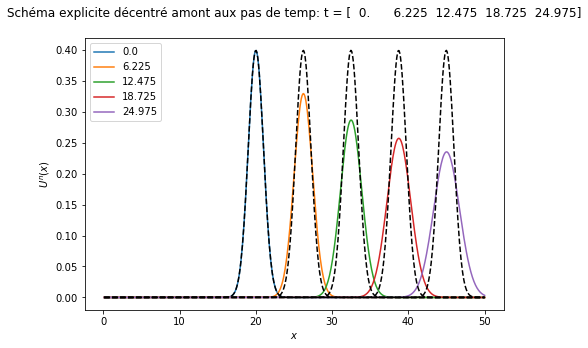

### Q3

L’expression du schéma de Crank-Nicholson:

$$
\frac{u_j^{n+1}-u_j^n}{\Delta t} + \frac{V}{2}(\frac{u_{j+1}^n-u_{j-1}^n}{2\Delta x} + \frac{u_{j+1}^{n+1}-u_{j-1}^{n+1}}{2\Delta x}) = 0
$$

D'abord nous allons vérifier que $U^{n+1}$ est donné par la relation de récurrence.

$$
(I_N + \frac{V\Delta t}{2} K_c) U^{n+1} = (I_N - \frac{V\Delta t}{2} K_c) U^{n}
$$

En partant du schéma de Crank-Nicholson, nous avons

$$
u_j^{n+1} + \frac{V\Delta t}{2}(\frac{u_{j+1}^{n+1}-u_{j-1}^{n+1}}{2\Delta x}) = u_j^{n} - \frac{V\Delta t}{2}(\frac{u_{j+1}^{n}-u_{j-1}^{n}}{2\Delta x})
$$

Alors nous avons 

$$
(I_N + \frac{V\Delta t}{2} K_c) U^{n+1} = (I_N - \frac{V\Delta t}{2} K_c) U^{n}
$$

Avec $K_c$ égale

$$
\frac{1}{2\Delta x}\left[\begin{array}{ccccc}
    0 & 1 & & & \Huge{0}\\
    -1 & 0 & 1\\
          & \ldots & \ldots\\
          & & \ldots & \ldots\\
          & & -1 & 0 & 1\\
\Huge{0} & & & -1 & 0
\end{array}\right]
$$

En suivant le même procédure que Q2, nous obtenons l'erreur de troncature

$$
\eta^n_j = \frac{\overline{U}_j^{n+1}-\overline{U}_j^{n}}{\Delta t} + \frac{V}{2}(\frac{\overline{U}_{j+1}^{n}-\overline{U}_{j-1}^{n}}{2\Delta x} + \frac{\overline{U}_{j+1}^{n+1}-\overline{U}_{j-1}^{n+1}}{2\Delta x})
$$

En appliquant les formules de Taylor, nous obtenons

$$
\begin{align}
\eta^n_j &= -\frac{1}{12}\frac{\partial^3{\overline{U}_j^{n}}}{\partial t^3}\Delta t^2 + \frac{V}{6}\frac{\partial^3{\overline{U}_j^{n}}}{\partial x^3}\Delta x^2 + o(\Delta t^2 + \Delta x^2)\\
&= O(\Delta t^2 + \Delta x^2)
\end{align}
$$

Alors, le schéma est consistant dont la précision à l'ordre 2 en temps et 2 en espace. Et l'équation équivalente s'écrit comme

$$
\frac{\partial u}{\partial t} + V\frac{\partial u}{\partial x} + \frac{V^3}{12}\frac{{\partial}^3u}{\partial x^3}\Delta t^2 + \frac{V}{6}\frac{{\partial}^3u}{\partial x^3}\Delta x^2 = 0
$$

Pour demontrer la stabilité inconditionnelle en norme $L^2$, nous allons utiliser la série de Fourier. 
Prenons 

$$\widetilde{u^n}(x) = u_j^n, \ \ \forall x \in [(j-1/2)\Delta x, (j+1/2)\Delta x], \ 0 \leq j \leq N+1 $$

Alors,
$$
\widehat{u(x)}_k^n = \int {\rm exp}(-i2\pi kx)\widetilde{u^n}(x) \rm{d} x
$$

Et

$$
\widehat{u(x+\Delta x)}_k^n = {\rm exp}(i2\pi k\Delta x)\widehat{u(x)}(k)
$$

Si nous réécrivons la relation de récurrence sous la forme du coefficient de la série de fourier, nous alors avons la relation ci-dessous:

$$
\widehat{u}_k^{n+1}[1 + \frac{V\Delta t}{4\Delta x}({\rm exp}(i2\pi k\Delta x) - {\rm exp}(-i2\pi k\Delta x))]\\
= \widehat{u}_k^{n}[1 - \frac{V\Delta t}{4\Delta x}({\rm exp}(i2\pi k\Delta x) - {\rm exp}(-i2\pi k\Delta x))]
$$

Ce que nous avons obtenu est équivalent que

$$
\widehat{u}_k^{n+1} = \widehat{u}_k^{n}\frac{1-\frac{iV\Delta t}{2\Delta x}\sin(2\pi k\Delta x)}{1+\frac{iV\Delta t}{2\Delta x}\sin(2\pi k\Delta x)}
$$

Par la formule de Plancherel,

$$
\int \mid\widetilde{u^n}(x)\mid^2 {\rm d}x = \sum \mid\widehat{u}_k\mid^2, k\in \Bbb Z
$$

Alors dans ce cas

$$|A|  = |\frac{1-\frac{iV\Delta t}{2\Delta x}\sin(2\pi k\Delta x)}{1+\frac{iV\Delta t}{2\Delta x}\sin(2\pi k\Delta x)}| = 1
$$

Donc le schéma de Crank-Nicholson est unconditionnellement stable en norme $L^2$.

Comme la figure au-dessous, le schéma de Crank-Nicholson converge parfaitement au cours du temps.

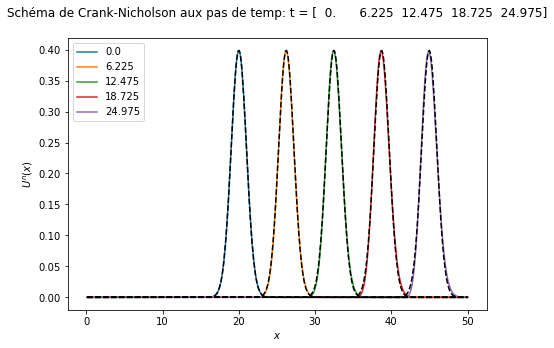
### Q4

Comme nous avons chosi $V =1$, $\Delta t = 0.025$, $\Delta x =0.1$, la condition $\frac{V\Delta t}{\Delta x} = 0.25$ est automatiquement satisfate. Alors, comme les figures dans Q2 et Q3 montrent, la convergence des deux schémas est vraiment différente. Le schéma de Crank-Nicholson est incoditionellement convergent, de l'ordre $O(\Delta t^2 + \Delta x^2)$, mais le schéma explicite décentré est coditionnellement convergent, de l'ordre$O(\Delta t^ + \Delta x^)$. Alors, il existe moins de l'erreur pour le schéma de Crank-Nicholson que pour le schéma explicite décentré.

## 1.2 Équation de convection-diffusion uni-dimensionnelle
Nous nous intéressons à présent à l’équation de convection-diffusion en une dimension d’espace 

$$
\begin{cases}
\frac {\partial u} {\partial t}(t,x) + V\frac {\partial u} {\partial x}(t,x) - \nu\frac{\partial^2u}{\partial x^2} = 0, \ \forall x \in \Bbb{R}, \forall t >0\\
u(t=0, x)= u_0(x), \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall x \in \Bbb{R}
\end{cases}
\tag{4}
$$

Dans les mêmes conditions que la section précédente, nous utilisons le schéma de Crank-Nicholson

$$
\frac{u_j^{n+1}-u_j^n}{\Delta t} + \frac{V}{2}(\frac{u_{j+1}^n-u_{j-1}^n}{2\Delta x} + \frac{u_{j+1}^{n+1}-u_{j-1}^{n+1}}{2\Delta x}) \\
- \frac{\nu}{2}(\frac{u_{j+1}^n - 2u_{j}^n + u_{j-1}^n}{\Delta x^2}+\frac{u_{j+1}^{n+1} - 2u_{j}^{n+1} + u_{j-1}^{n+1}}{\Delta x^2}) = 0
$$

### Q5

En partant du le schéma de Crank-Nicholson, nous pouvons obtenir une relation de récurrence:

$$
u_j^{n+1} + \frac{V\Delta t}{2}(\frac{u_{j+1}^{n+1}-u_{j-1}^{n+1}}{2\Delta x})-\frac{\nu \Delta t}{2}(\frac{u_{j+1}^{n+1}-2u_{j}^{n+1}+u_{j-1}^{n+1}}{\Delta x^2}) \\ = u_j^{n} - \frac{V\Delta t}{2}(\frac{u_{j+1}^{n}-u_{j-1}^{n}}{2\Delta x})+\frac{\nu \Delta t}{2}(\frac{u_{j+1}^{n}-2u_{j}^{n}+u_{j-1}^{n}}{\Delta x^2})
$$

Nous pouvons réécrire cette relation comme

$$
(I_n + \frac{V\Delta t}{2}K_c-\frac{\nu \Delta t}{2}A)U^{n+1}=(I_n-\frac{V\Delta t}{c}K_c+\frac{\nu \Delta t}{2}A)U^{n}
$$

Avec $A$ égale

$$
\frac{1}{\Delta x^2}\left[\begin{array}{ccccc}
    -2 & 1 & & & \Huge{0}\\
    -1 & -2 & 1\\
          & \ldots & \ldots\\
          & & \ldots & \ldots\\
          & & -1 & -2 & 1\\
\Huge{0} & & & -1 & -2
\end{array}\right]
$$

Nous avons testé le schéma avec $\mu = 1$. Au cours du temps, on peut observer la translation et la diffusion de la concentration du produit chimique, mais au bord du domaine, le produit chimique accumule et la concentration est anormalement haute. Cette phénomène est à cause de la condition au bord de Dirichlet.
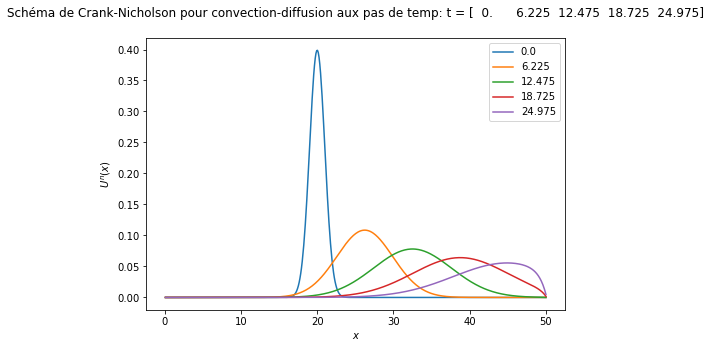

### Q6
Sous des conditions de type Neumann homogène qui reviennent à imposer

$$
\frac{u_{N+1}-u_N}{\Delta x}=0
$$

nous devons modifier les matrices $K_c$ et $A$. 

$$
K_c=\frac{1}{2\Delta x}\left[\begin{array}{ccccc}
    0 & 1 & & & \Huge{0}\\
    -1 & 0 & 1\\
          & \ldots & \ldots\\
          & & \ldots & \ldots\\
          & & -1 & 0 & 1\\
\Huge{0} & & & -1 & 1
\end{array}\right]
$$

$$
A = \frac{1}{\Delta x^2}\left[\begin{array}{ccccc}
    -2 & 1 & & & \Huge{0}\\
    1 & -2 & 1\\
          & \ldots & \ldots\\
          & & \ldots & \ldots\\
          & & 1 & -2 & 1\\
\Huge{0} & & & 1 & -1
\end{array}\right]
$$

Comme la figure au-dessous montre, avec la condition de Neumann, le produit chimique n'accumule plus au bord du domaine, et diffuse dehors du domaine de la simulation.

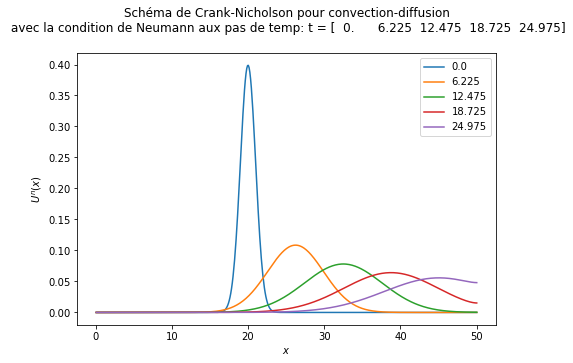

### Q7
Afin de simuler l’action d’une usine déversant un produit chimique, on suppose que la concentration à $t=0$ est nulle et on introduit un terme de source $f(t,x)$.

$$
\begin{cases}
\frac {\partial u}{\partial t}(t,x) + V\frac{\partial u}{\partial x}(t,x) - \nu\frac{\partial^2u}{\partial x^2}(t,x) = f(t,x),\ \ \forall x \in \Bbb{R}, \ \forall t>0\\
u(t=0, x) = 0, \ \ \forall x\in \Bbb{R}
\end{cases}
\tag{5}
$$

A l’aide d’une discrétisation $f_j^n=f(t_n, x_j)$ de $f$, le schéma de Crank-Nicholson peut être modifié comme.

$$
\frac{u_j^{n+1}-u_j^n}{\Delta t} + \frac{V}{2}(\frac{u_{j+1}^n-u_{j-1}^n}{2\Delta x} + \frac{u_{j+1}^{n+1}-u_{j-1}^{n+1}}{2\Delta x}) \\
- \frac{\nu}{2}(\frac{u_{j+1}^n - 2u_{j}^n + u_{j-1}^n}{\Delta x^2}+\frac{u_{j+1}^{n+1} - 2u_{j}^{n+1} + u_{j-1}^{n+1}}{\Delta x^2}) = \frac{f_{j}^{n}+f_{j}^{n+1}}{2}
$$

Ensuite, nous pouvons corrélativement modifier l’équation de récurrence obtenue en question Q5:

$$
(I_n + \frac{V\Delta t}{2}K_c-\frac{\nu \Delta t}{2}A)U^{n+1}-\frac{1}{2}F^{n+1}=(I_n-\frac{V\Delta t}{c}K_c+\frac{\nu \Delta t}{2}A)U^{n}+\frac{1}{2}F^{n}
$$

Avec $F^n = (f^n_j)_{1≤j≤N}$.

Pour simuler l’action d’une usine ne fonctionnant que la moitié du temps dans une journée, on teste le schéma avec

$$
f(t,x)=
\begin{cases}
f_{x_0,\sigma}(x)\ \ \ &{\rm si}\ \lfloor t \rfloor\ {\rm est pair},\\
0\ \ \ &{\rm si}\ \lfloor t \rfloor\ {\rm est impair.}
\end{cases}
$$

La figure au-dessous montre la concentration du produit chimique au cours du temps avec cette source.
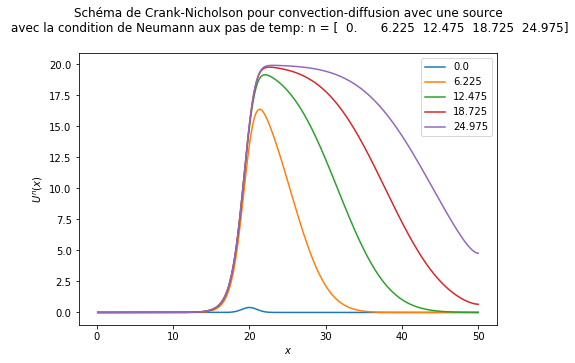

Ensuite, on doit trouver une durée de pause de façon à assurer que la concentration en x=50 ne dépasse pas 0.4 une fois le régime stationnaire atteint. Par la simulation, on trouve que quand $t = 50s$, l'état stationaire est atteint, et si on prend une source telle que la durée de pause $:$ la durée de fonctionnement est $100:1$, la concentration ne dépasse pas 0.4, comme la figure au-dessous montre.
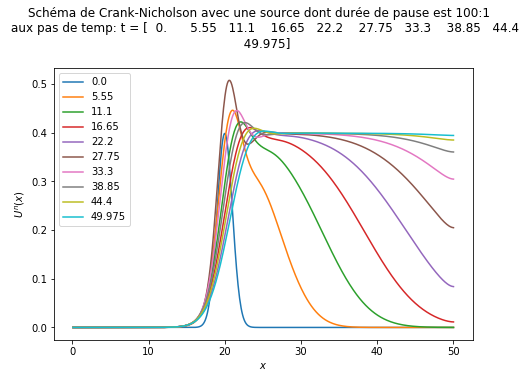

# 2 Évolution de la concentration dans le fleuve bidimensionnel
 
Nous négligons toujours la profondeur du fleuve, mais nous souhaitons connaitre l’influence des courants provoqués par la topographie sur l’évolution de la concentration de produit chimique. Nous cherchons toujours à employer des schémas de type Crank-Nicholson pour leur bonnes propriétés mais leur caractère implicite nous impose un travail préliminaire.

## 2.1 Discrétisation du Laplacien en dimension 2

Nous cherchons à simuler via différences finies une fonction $u(x,y)$ solution de l’équation de Laplace

$$
\begin{cases}
-\Delta u(x,y)=f(x,y),&\forall(x,y)\in\Omega=]0,L[\times]0,L[\\
u(x,y)=0,&\forall(x,y)\in\partial\Omega
\end{cases}
\tag{6}
$$

Pour résoudre numériquement cette équation, nous utilisons alors

- $h$ le pas de discrétisation en espace commun aux deux directions;
- $N = \frac {L}{h}-1$, la taille de la maille;
- $x_i = ih$ et $y_i = jh$ les coordonnées des points de la maille, $0\leq i,j\leq N+1$
- $u_{i,j}$ l’approximation de $u(x_i, y_j)$;
- $f_{i,j}=f(x_i, y_j)$, la discrétisation de $f$ aux points de la maille.

Nous utilisons pour calculer les $(u_{i,j})_{1\leq i,j\leq N}$ le schéma aux différence finies

$$
-\frac{u_{i-1,j} - 2u_{i,j} + u_{i+1,j}}{h^2}-\frac{u_{i,j-1} - 2u_{i,j} + u_{i,j+1}}{h^2}=f_{i,j}, \ \ \ 1\leq i,j\leq N.
$$

### Q8
Nous introduissons le vecteur U de taille $N^2$ qui est donné par la concaténation des lignes de la matrice $(u_{i,j})_{1≤i,j≤N}$:

$$
U_{(i−1)N+j}=u_{i,j}\ \ \ {\rm pour} \ 1\leq i,j\leq N.
$$

Soit $−AU = b$, alors

$$
A = \frac{1}{h^2}\left[\begin{array}{ccccccccc}
    -4 & 1 & \overbrace{\ldots}^{(N-1)*0} & 1 & \\
    1 & -4 & 1 &\ldots& 1 &\\
          & & & \ldots & & & \ldots &\\
          1 & \overbrace{\ldots}^{(N-1)*0}&  1 & -4 & 1 &\ldots& 1 &  \\
          & 1 &\ldots&  1 & -4 & 1 &\ldots& 1 \\
          & & & \ldots & & &\ldots &\\
          &&&1 &\ldots&  1 & -4 & 1 &\ldots& 1 &  \\
          &  & &  \ldots & && \ldots &\\
          &&&& & 1 &\ldots& 1 & -4 & 1\\
   &&&& & & 1 &\ldots& 1 & -4
\end{array}\right]
$$

Et

$$
b_{(i−1)N+j}=f_{i,j}\ \ \ {\rm pour} \ 1\leq i,j\leq N.
$$

Nous introduisons le vecteur erreur $e = U - \overline{U}$, avec $\overline{U}_{(i-1)N+j}=\overline{u}_{i,j}=u(x_i,y_j)$. 

De plus,

$$
Ae = A\overline{U}-AU = A\overline{U} + b
$$

Avec l'aide des fomules de Taylor, nous avons
$$
\begin{align}
A\overline{U}_{(i-1)N+j} &= \frac{\overline{u}_{i-1,j} - 2\overline{u}_{i,j} + \overline{u}_{i+1,j}}{h^2}-\frac{\overline{u}_{i,j-1} - 2\overline{u}_{i,j} + \overline{u}_{i,j+1}}{h^2}\\
&=\frac{\partial^2 \overline{u}_{i,j}}{\partial x^2} + \frac{\partial^2 \overline{u}_{i,j}}{\partial y^2}+\frac{h^2}{12}(\frac{\partial^4 \overline{u}_{i,j}}{\partial x^4}+\frac{\partial^4 \overline{u}_{i,j}}{\partial y^4}) + O(h^4)
\end{align}
$$

Alors,

$$
Ae_{(i-1)N+j} = A\overline{U}_{(i-1)N+j}-AU_{(i-1)N+j} = A\overline{U}_{(i-1)N+j} + b_{(i-1)N+j} = (\frac{\partial^2 \overline{u}_{i,j}}{\partial x^2} + \frac{\partial^2 \overline{u}_{i,j}}{\partial y^2} + f_{i,j})+O(h^2)=O(h^2)
$$

Donc l’ordre de convergence du schéma est 2. 

Pour ce problème, nous utilisons le même terme source que nous allons utiliser dans Q10.

$$
f_{x_0,y_0,σ}(x)=\frac{1}{\sigma\sqrt{2\pi}}{\rm exp}\left(-\frac{(x-x_0)^2+(y-y_0)^2}{2\sigma^2}\right)
$$

La solution exacte de l'equation de Laplace s'écrit comme

$$
u(x,y)= -\frac{1}{2\pi}\int\int{\rm ln}\left(\sqrt{(x-t_x)^2+(y-t_y)^2}\right)f(t_x,t_y)\ {\rm d}t_x{\rm d}t_y
$$

On résout l'équation de Laplace numériquement numériquement avec la source ci-dessus, et on peut le résultat dans la figure ci-dessous. 

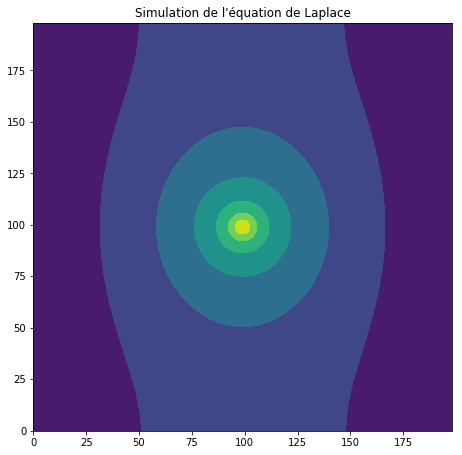


## 2.2 Équation de convection diffusion bi-dimensionnelle


Nous pouvons à présent simuler le comportement de la concentration de polluant lorsqu’il s’écoule dans le fleuve en dimension 2. On modélise son évolution par l’équation de réaction diffusion sur un domaine $\Omega=]0,L,[\times]0,l[$ avec conditions de Dirichlet au bord :

$$
\begin{cases}
\frac{\partial u}{\partial t}+V^x\frac{\partial u}{\partial x}+V^y\frac{\partial u}{\partial y}-\nu\frac{\partial^2 u}{\partial x^2}-\nu\frac{\partial^2 u}{\partial y^2}=0&\forall(x,y)\in\Omega,\ \forall t>0.\\
u(t=0,x,y)=u_0(x,y)&\forall(x,y)\in\Omega.\\
u(t,x,y)=0&\forall(x,y)\in\partial\Omega,\forall t>0.
\end{cases}
\tag{7}
$$

Pour simplifier l’application numérique, nous allons supposer que la maille possède $N$ points dans chaque direction et $L = 5l$. Pour résoudre numériquement cette équation nous utilisons de plus

- $\Delta t$ le pas de discrétisation en temps;
- $t^n = n\Delta t$ les coordonnées du maillage temporel;
- $u^n_{i,j}$ l’approximation de $u(t^n, x_i, y_j)$;
- $V_{i,j}^x=V^x(x_i,y_j)$ et $V_{i,j}^y=V^y(x_i,y_j)$ la discrétisation de $V =(V^x,V^y)$;
- $U^n$ de taille $N^2$ donné par la concaténation des lignes de la matrice $(u^n_{i,j})_{1<i,j<N}$, pour chaque $N\in\Bbb{N}$ 

Le schéma de Crank-Nicholson correspondant s’écrit dans ce cas

$$
0 = \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+\frac{V_{i,j}^x}{2}(\frac{u_{i+1,j}^{n}-u_{i-1,j}^{n}}{2\Delta x}+\frac{u_{i+1,j}^{n+1}-u_{i-1,j}^{n+1}}{2\Delta x})+\frac{V_{i,j}^y}{2}(\frac{u_{i,j+1}^{n}-u_{i,j-1}^{n}}{2\Delta y}+\frac{u_{i,j+1}^{n+1}-u_{i,j-1}^{n+1}}{2\Delta y})\\-\frac{\nu}{2}(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i+1,j}^{n+1}-2u_{i,j}^{n+1}+u_{i-1,j}^{n+1}}{\Delta x^2})-\frac{\nu}{2}(\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}+\frac{u_{i,j+1}^{n+1}-2u_{i,j}^{n+1}+u_{i,j-1}^{n+1}}{\Delta y^2})
$$

### Q9

Nous supposons dans un premier temps que $V = (1, 0)$. Et par le schéma de Crank-Nicholson, nous avons alors 

$$
u_{i,j}^{n+1} + \frac{\Delta t}{2}(\frac{u_{i+1,j}^{n+1}-u_{i-1,j}^{n+1}}{2\Delta x})-\frac{\nu\Delta t}{2}(\frac{u_{i+1,j}^{n+1}-2u_{i,j}^{n+1}+u_{i-1,j}^{n+1}}{\Delta x^2}+\frac{u_{i,j+1}^{n+1}-2u_{i,j}^{n+1}+u_{i,j-1}^{n+1}}{\Delta y^2})\\=u_{i,j}^{n}-\frac{\Delta t}{2}(\frac{u_{i+1,j}^{n}-u_{i-1,j}^{n}}{2\Delta x})+\frac{\nu\Delta t}{2}(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2})
$$

Alors,

$$
U_{(i-1)N+j}^{n+1} + \frac{\Delta t}{2}(\frac{U_{iN+j}^{n+1}-U_{(i-2)N+j}^{n+1}}{2\Delta x})- \\ 
\frac{\nu\Delta t}{2}(\frac{U_{iN+j}^{n+1}-2U_{(i-1)N+j}^{n+1}+U_{(i-2)N+j}^{n+1}}{\Delta x^2}+\frac{U_{(i-1)N+j+1}^{n+1}-2U_{(i-1)N+j}^{n+1}+U_{(i-1)N+j-1}^{n+1}}{\Delta y^2})\\=U_{(i-1)N+j}^{n}-\frac{\Delta t}{2}(\frac{U_{iN+j}^{n}-U_{(i-2)N+j}^{n}}{2\Delta x})+ \\
\frac{\nu\Delta t}{2}(\frac{U_{iN+j}^{n}-2U_{(i-1)N+j}^{n}+U_{(i-2)N+j}^{n}}{\Delta x^2}+\frac{U_{(i-1)N+j+1}^{n}-2U_{(i-1)N+j}^{n}+U_{(i-1)N+j-1}^{n}}{\Delta y^2})
$$

Donc nous avons

$$
(I_N+\frac{\Delta t}{2}(K_c^x+K_c^y)-\frac{\nu\Delta t}{2}A)U^{n+1}=(I_N-\frac{\Delta t}{2}(K_c^x+K_c^y)+\frac{\nu\Delta t}{2}A)U^{n}
$$

Avec

$$
K_c^x = \frac{1}{2\Delta x}\left[\begin{array}{ccccc}
    1 &\overbrace{\ldots}^{N-1*0}&  1 & & & \Huge{0}\\
    & \ldots & \ldots\\
    -1 &\overbrace{\ldots}^{N-1*0}&  1 &\ldots& 1\\
          & & \ldots & \ldots\\
           && -1 &\ldots&  1 &\ldots&  1\\
\Huge{0}  && && -1 &\ldots&  1
\end{array}\right]
\ \ \  et \ \ \ K_c^y = 0
$$

De plus, A est ce que nous avons déjà trouvé dans Q8.

### Q10

Nous allons tester le schéma pour calculer une approximation de la solution de (7) sur $[0, T]$. Nous effectuerions les simulations avec $\nu = 1,\ L = 100,\ l=20,\ T = 25,\ \Delta x = \Delta y = 0.5,\ \Delta t = 0.05$ et la condition initiale $u_0 = f_{x_0,y_0,σ}$ pour

$$
f_{x_0,y_0,σ}(x)=\frac{1}{\sigma\sqrt{2\pi}}{\rm exp}\left(-\frac{(x-x_0)^2+(y-y_0)^2}{2\sigma^2}\right)
$$

avec $x_0 = L/2$, $y_0 = l/2$ et $\sigma=1$.

La figure au-dessous montre le résulta de la simulation avec cette condition initiale.
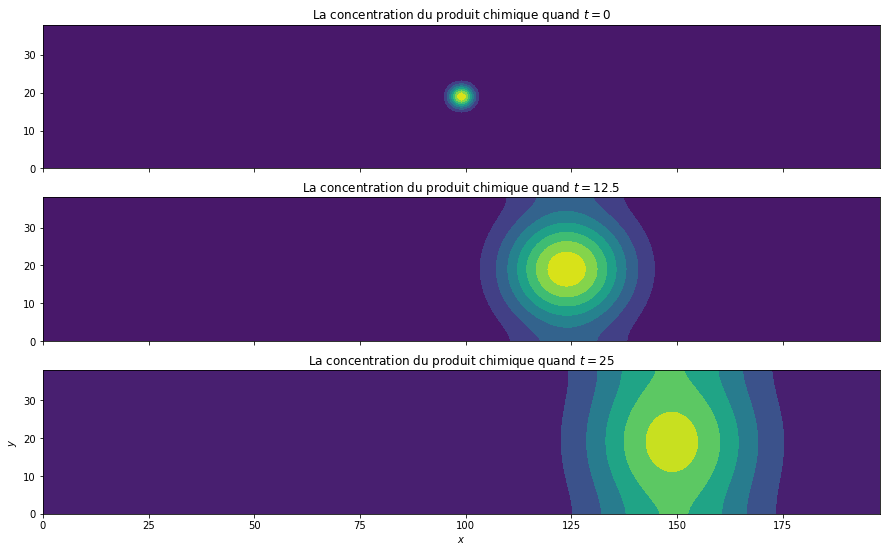




Nous supposerions par la suite que la condition initiale est nulle.
### Q11

Afin de modéliser le déversement du produit chimique dans le fleuve, nous modifions le schéma afin de prendre en compte la participation du terme source $f$. Le terme source est donné par $f = f_{x_0,y_0,σ}$ avec $x_0 =20$ et $y_0 =l$ et $σ=1$. Alors, maintenant, le schéma s'écrit comme

$$
(I_N+\frac{\Delta t}{2}(K_c^x+K_c^y)-\frac{\nu\Delta t}{2}A)U^{n+1}=(I_N-\frac{\Delta t}{2}(K_c^x+K_c^y)+\frac{\nu\Delta t}{2}A)U^{n} + F
$$

avec $F$ de taille $N^2$ et $F_{(i-1)N+j}=f(x_i,y_j)$.

Comme nous pouvons voir dans la figure au-dessous, le produit chimique accumule à la rive opposée par la diffusion, et au cours du temps, le produit chimique disperse vers la droite, car la vitesse de courant est positif, ainsi, le courant coule vers la droite. Cependant, on observe il existe une troncature au bord du domaine($x=50$), car on impose la condition de Dirichlet au bord. Dans ce cas, le produit chimique ne peut pas disperser dehors du domaine de notre simulation.

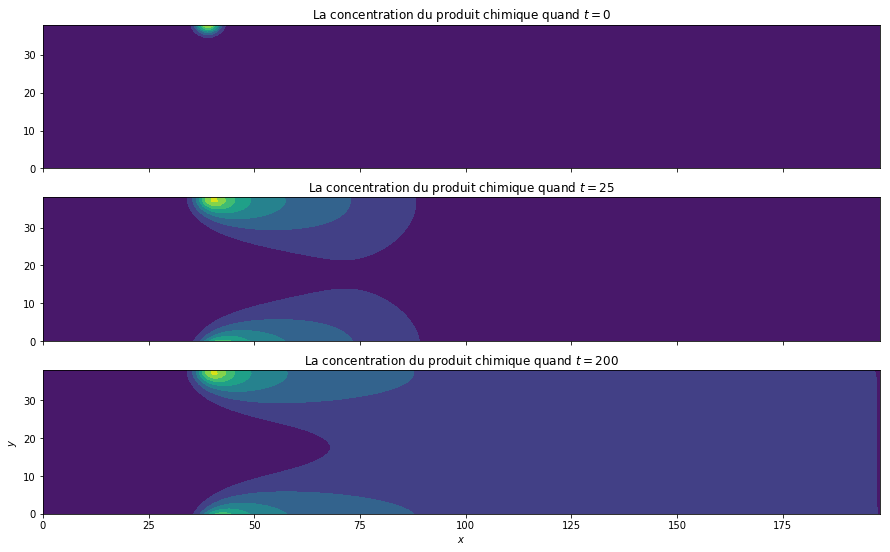

### Q12
Pour modéliser le fait que l’on n’observe qu’une troncature du fleuve, de la même manière qu’en partie 1, modifier les matrices $K_c^x$, $K_c^y$ et $A$ afin d’imposer des conditions de type Neumann aux bords $x = 0$ et $x = L$. 

Pour les conditions de type Neumann aux bords, nous avons

$$
\frac{u_{1,j}-u_{0,j}}{\Delta x}=0, \ \ \ et\ \ \  \frac{u_{N+1,j}-u_{N,j}}{\Delta x}=0
$$

Le schéma de Crank-Nicholson correspondant s’écrit dans ce cas

$$
U_{(i-1)N+j}^{n+1} + \frac{\Delta t}{2}V_{i,j}^x(\frac{U_{iN+j}^{n+1}-U_{(i-2)N+j}^{n+1}}{2\Delta x})+ \frac{\Delta t}{2}V_{i,j}^y(\frac{U_{(i-1)N)+j+1}^{n+1}-U_{(i-1)N+j-1}^{n+1}}{2\Delta y})-\frac{\nu\Delta t}{2}(\frac{U_{iN+j}^{n+1}-2U_{(i-1)N+j}^{n+1}+U_{(i-2)N+j}^{n+1}}{\Delta x^2}+\frac{U_{(i-1)N+j+1}^{n+1}-2U_{(i-1)N+j}^{n+1}+U_{(i-1)N+j-1}^{n+1}}{\Delta y^2})= \\
U_{(i-1)N+j}^{n}-\frac{\Delta t}{2}V_{i,j}^x(\frac{U_{iN+j}^{n}-U_{(i-2)N+j}^{n}}{2\Delta x})-\frac{\Delta t}{2}V_{i,j}^y(\frac{U_{(i-1)N)+j+1}^{n}-U_{(i-1)N+j-1}^{n}}{2\Delta y}+ \\
\frac{\nu\Delta t}{2}(\frac{U_{iN+j}^{n}-2U_{(i-1)N+j}^{n}+U_{(i-2)N+j}^{n}}{\Delta x^2}+\frac{U_{(i-1)N+j+1}^{n}-2U_{(i-1)N+j}^{n}+U_{(i-1)N+j-1}^{n}}{\Delta y^2})+F_{(i-1)N+j}
$$

Si nous écrivons ce schéma sous la forme de matrice, alors nous avons 

$$
(I_N+\frac{\Delta t}{2}(K_c^x+K_c^y)-\frac{\nu\Delta t}{2}(A_x+A_y))U^{n+1}=(I_N-\frac{\Delta t}{2}(K_c^x+K_c^y)+\frac{\nu\Delta t}{2}(A_x+A_y))U^{n}+F
$$

avec

$$
K_c^x= \frac{1}{2\Delta x}\left[\begin{array}{ccccc}
    -V_{1,1}^x &\overbrace{\ldots}^{N-1*0}&  V_{1,1}^x & & & \\
    &-V_{1,2}^x &\ldots&  V_{1,2}^x & & \\
    &&\ldots  &&\ldots\\
    -V_{2,1}^x &\overbrace{\ldots}^{N-1*0}&&  0 &\ldots& V_{2,1}^x\\
    &-V_{2,2}^x &\ldots && 0 &\ldots& V_{2,2}^x\\
         &&&\ldots  &&\ldots\\
          && & -V_{N-1,N}^x &&\ldots&  0 &\ldots&  V_{N-1,N}^x\\
          & & &&-V_{N,1}^x &&\ldots&   V_{N,1}^x\\
           &&&\ldots  &&\ldots\\
 && && &&-V_{N,N}^x &\ldots& V_{N,N}^x 
\end{array}\right]
$$

$$
K_c^y=\frac{1}{\Delta x^2}\left[\begin{array}{ccccc}
    0 & V_{1,1}^y & & & \\
    -V_{1,2}^y & 0 & V_{1,2}^y \\
          & \ldots & \ldots\\
          & & \ldots & \ldots\\
          & & -V_{N,N-1}^y & 0 & V_{N,N-1}^y\\
 & & & -V_{N,N}^y & 0
\end{array}\right]
$$

$$
A^x = \frac{1}{2\Delta y}\left[\begin{array}{ccccc}
    -1 &\overbrace{\ldots}^{N-1*0}&  1 & & & \\
    &-1 &\ldots&  1 & & &\\
    & &&\ldots & \ldots\\
    1 &\overbrace{\ldots}^{N-1*0}&&  -2 &\ldots& 1\\
    &1 &&\ldots&  -2 &\ldots& 1\\
          &&&& & \ldots & \ldots\\
           &&& 1&\ldots&&  -2 &\ldots&  1\\
           &&&& 1& &\ldots&  -1 \\
           &&&& & \ldots & \ldots\\
\  &&&& && 1 &\ldots&  -1
\end{array}\right]
$$


$$
A^y=\frac{1}{\Delta y^2}\left[\begin{array}{ccccc}
    -2 & 1 & & &\\
    1 & -2 & 1\\
          & \ldots & \ldots\\
          & & \ldots & \ldots\\
           && 1 & -2 & 1\\
 && &1 & -2
\end{array}\right]
$$

Après avoir modifié les matrices pour adopter la condition de Neumann, nous avons relancer la simulation et le résulatat est montré dans la figure au-dessous. Nous pouvons noter que au bord($x=50$), il n'existe plus la troncature et le produit chimique disperse dehors le domaine de notre simulation. Dans ce cas, la simulation est plus proche que la situation réelle.

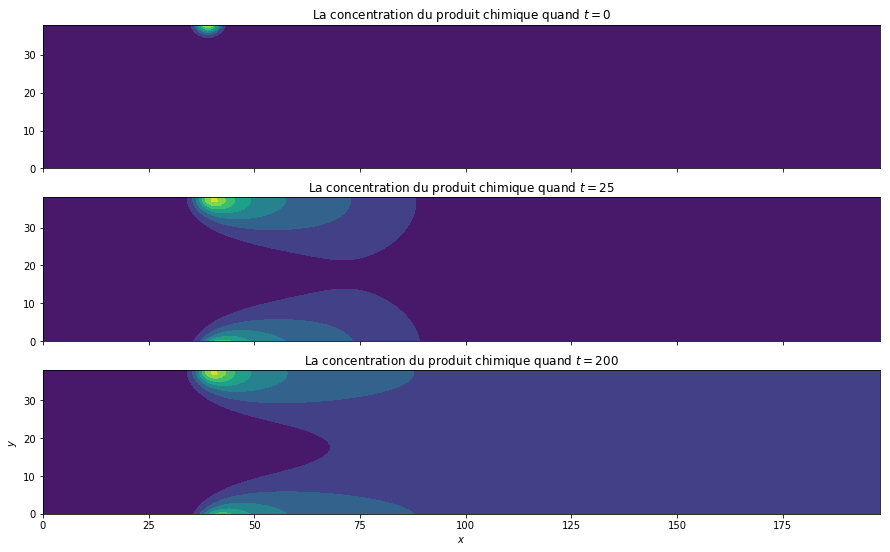

### Q13

Soit
$$ g(x) = e^{-x^2/10}, \ \ \ h(x) = \begin{cases}
g(x-\frac{L}{8})\ \ \ &si\ x < \frac{L}{8} \\
g((x-\frac{L}{8})/10)\ \ \ &si\ x > \frac{L}{8}
\end{cases}
$$

et

$$
v(x,y) = \left(1, -\sin \left(\frac{2\pi y}{l} \right)\sin\left(\frac{4\pi x}{L}\right) \right), \ \ v_1(x,y) = 
\begin{cases}
v(x,y)\ \ & si\ x < \frac{L}{2} \\
v(0,0)\ \ & si\ x > \frac{L}{2}
\end{cases}
$$

On modélise la présence d'un îlot modifiant le courant en ($\frac{L}{8}$, $\frac{l}{2}$) par la présence d'un champ de vitesses
$$
V_1(x,y) = \left(1-h(x)g(y-l/2)\right) \cdot v_1(x,y).
$$

On modélise la présence de deux îlots modifiant le courant en ($\frac{L}{8}$, $\frac{l}{2}$) et ($\frac{5L}{8}$, $\frac{l}{2}$) par la présence d'un champ de vitesses 
$$
V_2(x,y) = \left(1-h(x)g(y-l/2)\right) \left(1-h(x-L/2)g(y-l/2)\right)\cdot v(x,y).
$$


Les deux vitesses proposés simulent deux situation: le premier champs de vitesse simule la présence d'un îlot qui modifie le courant en ($\frac{L}{8}$, $\frac{l}{2}$), le deuxième champs de vitesse simule la présence de deux îlots qui modifie le courant en ($\frac{L}{8}$, $\frac{l}{2}$) et ($\frac{5L}{8}$, $\frac{l}{2}$). Alors, nous allons faire la simulation avec les deux vitesses pour distinguer la différence dans les deux cas.
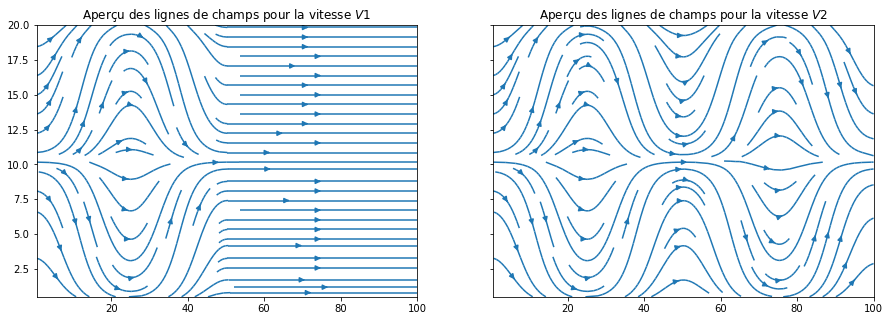

Nous avons choisi $\mu = 0.5$ pour mieux distinguer les deux cas. Par la simulation, nous pouvons voir que au début, il n'existe pas de grande différence entre les deux cas, anisi, le premier îlot ne pose pas obstacle pour la disspertion de produit chimique dans le fleuve. La vitesse de courant est positive, donc, le produit chimique disperse vers la droite. Nous pouvons aussi bien noté l'accumulation de produit chimique à la rive opposée à cause de la diffusion.
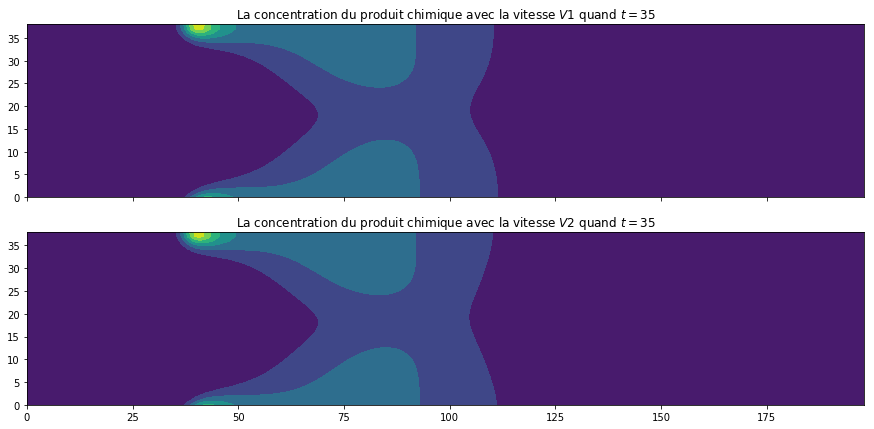

Au cours du temps, le produit chimique disperse vers la droite, et nous avons bien noté la différence entre les deux cas. Avec la vitesse $V_1$, ainsi, sans le deuxième îlot, le produit chimique disperse sans arrêt vers la droite. Cependant, avec la vitesse $V_2$, ainsi, avec le deuxième îlot, le produit chimique est empêché par le deuxième îlot en ($\frac{5L}{8}$, $\frac{l}{2}$), donc, la dispersion de produit chimique est moins vite que le premier cas.

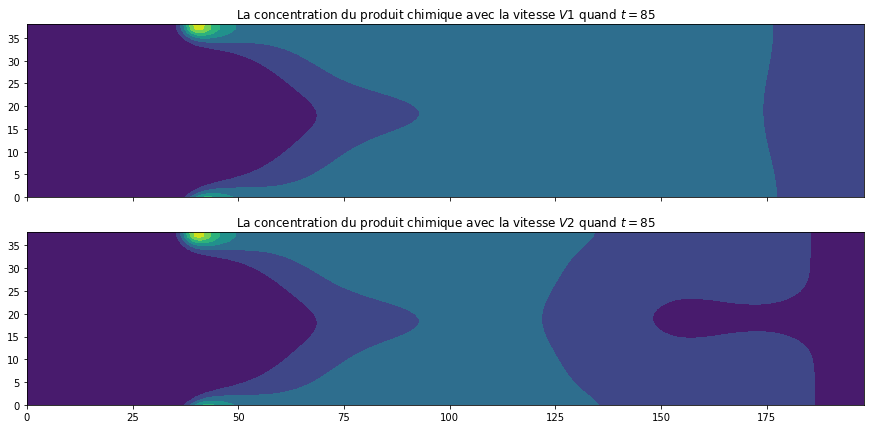


# Code

In [1]:
# Python 3
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
from scipy import sparse
from scipy.sparse import linalg

In [2]:
# Q1-Q3 paramètrès
def u0(x,x0,sigma):
    return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-x0)**2/(2*sigma**2))
L=50
T=25
V=1 
mu =1
del_x = 0.1
del_t = 0.025
N = int(L/del_x -1) 
M = int(T/del_t)
x0 = 20
sigma = 1
U_n = np.zeros((N,M))
U_solution = np.zeros((N,M)) # solution exacte
vec_x = np.linspace(del_x,L,N)
K_c = 1./(2.*del_x) * sparse.diags([-1,0,1],[-1,0,1],shape = (N,N)) 
I_N = np.identity(N)

In [3]:
#Q1 Schéma explicite centré
U_n[:,0] = u0(vec_x,x0,sigma)
U_solution[:,0] = u0(vec_x,x0,sigma)
for i in range(1,M):
    U_n[:,i] = (I_N - V*del_t*K_c).dot(U_n[:,i-1])
    U_solution[:,i] = u0(vec_x - i*del_t,x0,sigma)

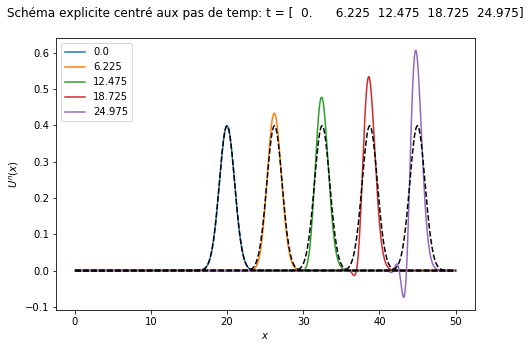

In [4]:
# Comparaison entre solution numérique et solution exacte
plt.figure(figsize=(7.5, 5))
t_plot = np.linspace(0,M-1,5,dtype = int)
plt.plot(vec_x, U_n[:,t_plot])
plt.plot(vec_x, U_solution[:,t_plot],'k--')
legend = t_plot/40
plt.title("Schéma explicite centré aux pas de temp: t = {0}\n".format(legend))
plt.legend(legend)
plt.xlabel("$x$")
plt.ylabel("$U^n(x)$")
plt.show()

# Schéma explicite centré n'est pas stable

In [6]:
# Q2 Schéma explicite décentré amont
K_d = 1/del_x * sparse.diags([-1,1],[-1,0],shape = [N,N])
U_nQ2 = np.zeros((N,M))
U_nQ2[:,0] = u0(vec_x,x0,sigma)
U_solution[:,0] = u0(vec_x,x0,sigma)
for i in range(1,M):
    U_nQ2[:,i] = (I_N - V*del_t*K_d).dot(U_nQ2[:,i-1])
    U_solution[:,i] = u0(vec_x - i*del_t,x0,sigma)

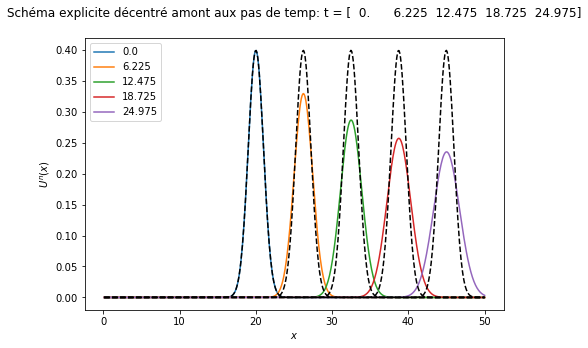

In [7]:
# Comparaison entre solution numérique et solution exacte
plt.figure(figsize=(7.5, 5))
t_plot = np.linspace(0,M-1,5,dtype = int)
legend = t_plot/40
plt.plot(vec_x, U_nQ2[:,t_plot])
plt.plot(vec_x, U_solution[:,t_plot],'k--')
plt.title("Schéma explicite décentré amont aux pas de temp: t = {0}\n".format(legend))
plt.legend(legend)
plt.xlabel("$x$")
plt.ylabel("$U^n(x)$")
plt.show()

In [8]:
#Q3 Crank-Nicholson
U_nQ3 = np.zeros((N,M))
U_nQ3[:,0] = u0(vec_x,x0,sigma)
U_solution[:,0] = u0(vec_x,x0,sigma)
for i in range(1,M):
    U_nQ3[:,i] = np.dot((I_N - V*del_t/2.*K_c).dot(U_nQ3[:,i-1]),(np.linalg.inv(I_N + V*del_t/2.*K_c)).transpose())
    U_solution[:,i] = u0(vec_x - i*del_t,x0,sigma)

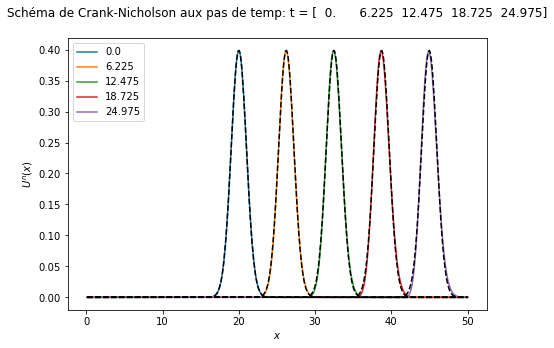

In [9]:
# Comparaison entre solution numérique et solution exacte
plt.figure(figsize=(7.5, 5))
t_plot = np.linspace(0,M-1,5,dtype = int)
legend = t_plot/40
plt.plot(vec_x, U_nQ3[:,t_plot])
plt.plot(vec_x, U_solution[:,t_plot],'k--')
plt.title("Schéma de Crank-Nicholson aux pas de temp: t = {0}\n".format(legend))
plt.legend(legend)
plt.xlabel("$x$")
plt.ylabel("$U^n(x)$")
plt.show()

In [17]:
#Q5 Schéma de Crank-Nicholson avec condition de Dirichlet
A = 1/(del_x*del_x)* sparse.diags([1,-2,1],[-1,0,1],shape=[N,N])
U_n = np.zeros((N,M))
U_n[:,0] = u0(vec_x,x0,sigma)
for i in range(1,M):
    U_n[:,i] = np.dot((I_N - V*del_t/2.*K_c + mu*del_t/2* A).dot(U_n[:,i-1]),(np.linalg.inv(I_N + V*del_t/2.*K_c-mu*del_t/2* A).transpose()))

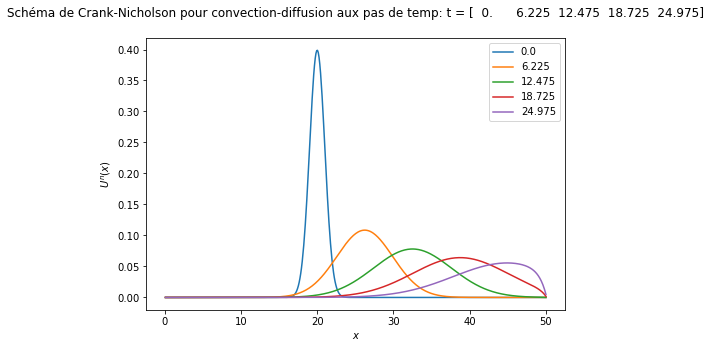

In [18]:
# la concentration au cours du temps.
plt.figure(figsize=(7.5, 5))
t_plot = np.linspace(0,M-1,5,dtype = int)
legend = t_plot/40
plt.plot(vec_x, U_n[:,t_plot])
plt.title("Schéma de Crank-Nicholson pour convection-diffusion aux pas de temp: t = {0}\n".format(legend))
plt.legend(legend)
plt.xlabel("$x$")
plt.ylabel("$U^n(x)$")
plt.show()

In [20]:
#Q6 La condition de type Neumann
K_c = 1./(2.*del_x) * sparse.diags([-1,0,1],[-1,0,1],shape = (N,N)).toarray()
K_c[N-1,N-1] = 1./(2.*del_x)*1
A = 1/(del_x*del_x)* sparse.diags([1,-2,1],[-1,0,1],shape=[N,N]).toarray()
A[N-1,N-1] = 1/(del_x*del_x)*(-1)
U_n = np.zeros((N,M))
U_n[:,0] = u0(vec_x,x0,sigma)
for i in range(1,M):
    U_n[:,i] = np.dot((I_N - V*del_t/2.*K_c + mu*del_t/2* A).dot(U_n[:,i-1]),(np.linalg.inv(I_N + V*del_t/2.*K_c-mu*del_t/2* A).transpose()))

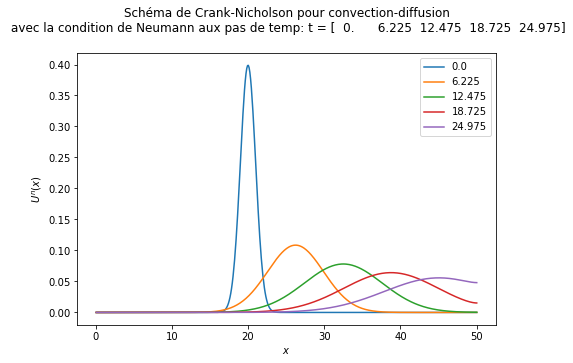

In [21]:
plt.figure(figsize=(7.5, 5))
t_plot = np.linspace(0,M-1,5,dtype = int)
legend = t_plot/40
plt.plot(vec_x, U_n[:,t_plot])
plt.title("Schéma de Crank-Nicholson pour convection-diffusion\n avec la condition de Neumann aux pas de temp: t = {0}\n".format(legend))
plt.legend(legend)
plt.xlabel("$x$")
plt.ylabel("$U^n(x)$")
plt.show()

In [22]:
# Q7  Simulation avec une source qui fonctionne la moitié dans une journée
def f(t,x):
    if int(t)%2==0:
        return u0(x,x0,sigma)
    else:
        return 0
K_c = 1./(2.*del_x) * sparse.diags([-1,0,1],[-1,0,1],shape = (N,N)).toarray()
K_c[N-1,N-1] = 1./(2.*del_x)*1
A = 1/(del_x*del_x)* sparse.diags([1,-2,1],[-1,0,1],shape=[N,N]).toarray()
A[N-1,N-1] = 1/(del_x*del_x)*(-1)
U_n = np.zeros((N,M))
U_n[:,0] = u0(vec_x,x0,sigma)
for i in range(1,M):
    U_n[:,i] = np.dot((I_N - V*del_t/2.*K_c + mu*del_t/2* A).dot(U_n[:,i-1]) + 0.5*(f(i,vec_x)+f(i-1,vec_x)),(np.linalg.inv(I_N + V*del_t/2.*K_c-mu*del_t/2* A).transpose()))

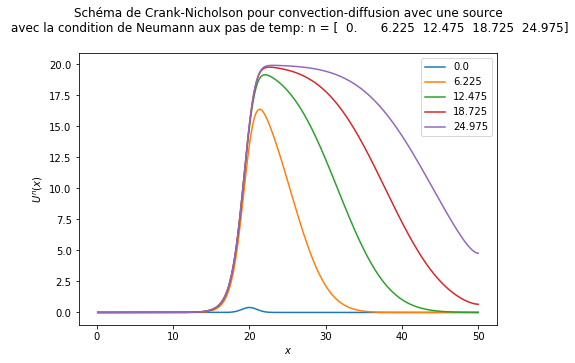

In [24]:
# la concentration au cours du temps
plt.figure(figsize=(7.5,5))
t_plot = np.linspace(0,M-1,5,dtype = int)
legend = t_plot/40
plt.plot(vec_x, U_n[:,t_plot])
plt.title("Schéma de Crank-Nicholson pour convection-diffusion avec une source\n avec la condition de Neumann aux pas de temp: n = {0}\n".format(legend))
plt.legend(legend)
plt.xlabel("$x$")
plt.ylabel("$U^n(x)$")
plt.show()

In [27]:
#Q7 proposer une source qui fonctionne que un pourcent de temps dans une journée, garantit la concentration ne dépasse
# pas 0.4 à l'état stationaire
def f_source(t,x):
    if int(t)%100==0:
        return u0(x,x0,sigma)
    else:
        return 0
K_c = 1./(2.*del_x) * sparse.diags([-1,0,1],[-1,0,1],shape = (N,N)).toarray()
K_c[N-1,N-1] = 1./(2.*del_x)*1
A = 1/(del_x*del_x)* sparse.diags([1,-2,1],[-1,0,1],shape=[N,N]).toarray()
A[N-1,N-1] = 1/(del_x*del_x)*(-1)
M = 2000 # changer le domaine du temps, T = 50
U_n = np.zeros((N,M))
U_n[:,0] = u0(vec_x,x0,sigma)
for i in range(1,M):
    U_n[:,i] = np.dot((I_N - V*del_t/2.*K_c + mu*del_t/2* A).dot(U_n[:,i-1]) + 0.5*(f_source(i,vec_x)+f_source(i-1,vec_x)),(np.linalg.inv(I_N + V*del_t/2.*K_c-mu*del_t/2* A).transpose()))


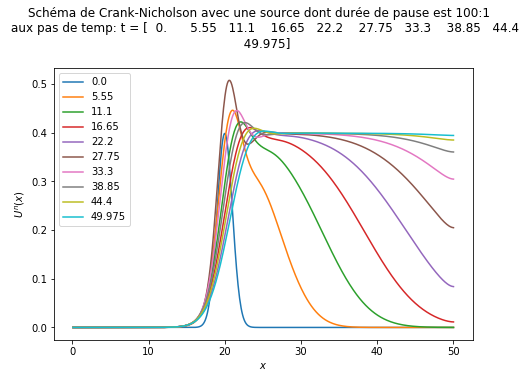

In [30]:
# figure
plt.figure(figsize=(7.5,5))
t_plot = np.linspace(0,M-1,10,dtype = int)
legend = t_plot/40
plt.plot(vec_x, U_n[:,t_plot])
plt.title("Schéma de Crank-Nicholson avec une source dont durée de pause est 100:1  \n aux pas de temp: t = {0}\n".format(legend))
plt.legend(legend)
plt.xlabel("$x$")
plt.ylabel("$U^n(x)$")
plt.show()

In [2]:
# Pour Q8-Q12
def f_2D_vec(xy_vec,x0,y0,sigma):
    xy0 = np.array([x0,y0])
    xy_vec_new = xy_vec - xy0
    xy_vec_new = xy_vec_new **2
    sum_xy = xy_vec_new[:,0]+xy_vec_new[:,1]
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-(sum_xy/(2*sigma*sigma)))
# initiation
mu = 1
L=100
l = int(L/5)
T=25
del_x = 0.5
del_y = 0.5
del_t = 0.05
x0 = L/2
y0 = l/2
sigma = 1.0
N_x = int(L/del_x -1)
N_y = int(l/del_y -1)
M = int(T/del_t)
U_n = np.zeros((N_x*N_y,M))
I_NN = sparse.identity(N_x*N_y)
x_vec = np.linspace(del_x, L,N_x)
y_vec = np.linspace(del_y,l,N_y)
xy_vec = np.zeros((N_x*N_y,2))
for i in range(N_x):
    for j in range(N_y):
        xy_vec[i*N_y+j,0] = (i+1)*del_x
        xy_vec[i*N_y+j,1] = (j+1)*del_y


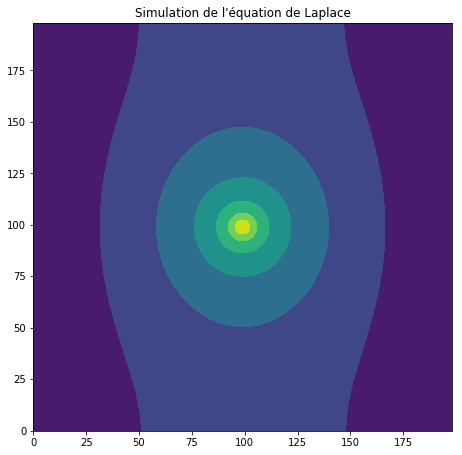

In [15]:
#Q8
from scipy import signal
A = 1./(del_x*del_x)* sparse.diags([1,1,-4,1,1],[-N_x,-1,0,1,N_x],shape= (N_x*N_x,N_x*N_x))
xx_vec = np.zeros((N_x*N_x,2))
for i in range(N_x):
    for j in range(N_x):
        xx_vec[i*N_x+j,0] = (i+1)*del_x 
        xx_vec[i*N_x+j,1] = (j+1)*del_x
b = f_2D_vec(xx_vec,L/2.,L/2.,sigma).reshape((N_x*N_x,1))
U = np.zeros((N_x*N_x))
A = sparse.csc_matrix(A)
lu_obj = linalg.splu(-A)
U = lu_obj.solve(b)

plt.figure(figsize=(7.5, 7.5))
plt.contourf(U.reshape(N_x,N_x).transpose())
plt.title("Simulation de l'équation de Laplace")
plt.show()

In [17]:
#Q10 tester le schéma avec la condition initiale est f
# définition des matrices et les calculs
U_n[:,0] = f_2D_vec(xy_vec,x0,y0,sigma)
K_xc = 1./(2.*del_x) * sparse.diags([-1,0,1],[-N_y,0,N_y],shape = (N_x*N_y,N_x*N_y))
A_x = 1./(del_x*del_x)* sparse.diags([1,-2,1],[-N_y,0,N_y],shape= (N_x*N_y,N_x*N_y))
A_y = 1./(del_y*del_y)* sparse.diags([1,-2,1],[-1,0,1],shape = (N_x*N_y,N_x*N_y))

M_sps = sparse.csc_matrix(I_NN + del_t/2.*K_xc - mu*del_t/2*(A_x+A_y))
lu_obj = linalg.splu(M_sps)
M_n = I_NN - del_t/2.*K_xc + mu*del_t/2*(A_x+A_y)
for i in range(1,M):
    U_n[:,i] = lu_obj.solve(M_n.dot(U_n[:,i-1]))

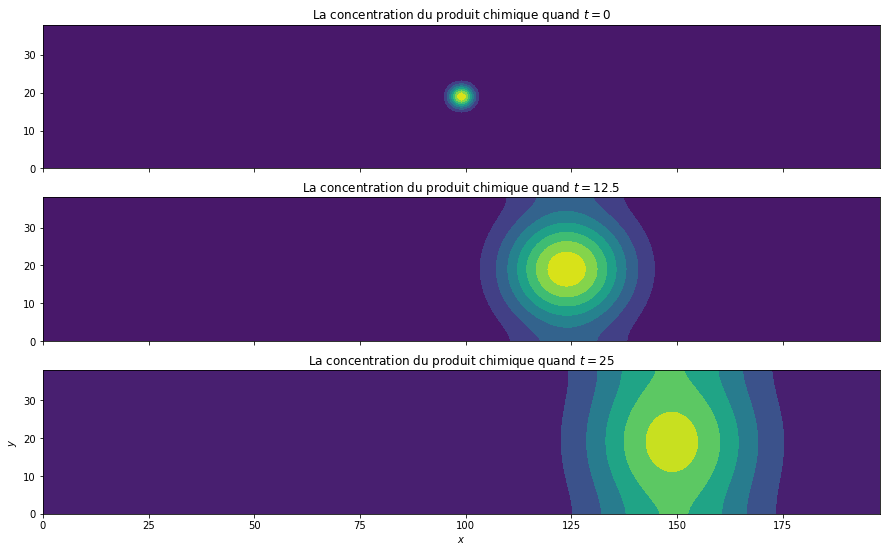

In [19]:
# figure
f, axarr = plt.subplots(3,figsize=(15, 9),sharex=True)
axarr[0].contourf(U_n[:,0].reshape(N_x,N_y).transpose())
axarr[0].set_title("La concentration du produit chimique quand $t=0$")
axarr[1].contourf(U_n[:,250].reshape(N_x,N_y).transpose())
axarr[1].set_title("La concentration du produit chimique quand $t=12.5$")
axarr[2].contourf(U_n[:,-1].reshape(N_x,N_y).transpose())
axarr[2].set_title("La concentration du produit chimique quand $t=25$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [20]:
#Q11 tester avec la source 
x0 = 20.
y0 = l
K_xc = 1./(2.*del_x) * sparse.diags([-1,0,1],[-N_y,0,N_y],shape = (N_x*N_y,N_x*N_y))
A_x = 1./(del_x*del_x)* sparse.diags([1,-2,1],[-N_y,0,N_y],shape= (N_x*N_y,N_x*N_y))
A_y = 1./(del_y*del_y)* sparse.diags([1,-2,1],[-1,0,1],shape = (N_x*N_y,N_x*N_y))

In [22]:
# calcul
M = 4000
source = f_2D_vec(xy_vec,x0,y0,sigma)
Un_q10 = np.zeros((N_x*N_y,M))
Un_q10[:,0] = 0.
M_sps = sparse.csc_matrix(I_NN + del_t/2.*K_xc - mu*del_t/2*(A_x+A_y))
lu_obj = linalg.splu(M_sps)
M_n = I_NN - del_t/2.*K_xc + mu*del_t/2*(A_x+A_y)
for i in range(1,M):
    Un_q10[:,i] = lu_obj.solve(M_n.dot(Un_q10[:,i-1]) + source)

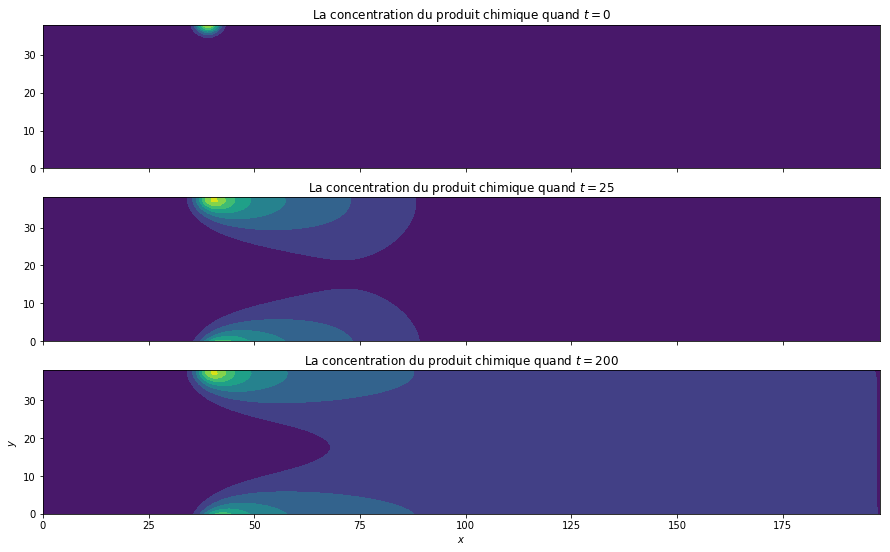

In [27]:
#figure
f, axarr = plt.subplots(3,figsize=(15, 9),sharex=True)
axarr[0].contourf(Un_q10[:,1].reshape(N_x,N_y).transpose())
axarr[0].set_title("La concentration du produit chimique quand $t=0$")
axarr[1].contourf(Un_q10[:,500].reshape(N_x,N_y).transpose())
axarr[1].set_title("La concentration du produit chimique quand $t=25$")
axarr[2].contourf(Un_q10[:,-1].reshape(N_x,N_y).transpose())
axarr[2].set_title("La concentration du produit chimique quand $t=200$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [28]:
#Q12 imposer la condition de Neumann au bord(x=0, x=L)
# definition des matrices
#diagonale des matrices creuses
diags = []
diags.append([-1 for i in range(N_x*N_y-N_y)])
tmp = [0 for i in range(N_x*N_y)]
for i in range(N_y):
    tmp[i] = -1
    tmp[-1-i] = 1
diags.append(tmp)
diags.append([1 for i in range(N_x*N_y-N_y)])
K_xc_new = 1./(2.*del_x) * sparse.diags(diags,[-N_y,0,N_y],shape = (N_x*N_y,N_x*N_y))
diags = []
diags.append([1 for i in range(N_x*N_y-N_y)])
tmp = [-2 for i in range(N_x*N_y)]
for i in range(N_y):
    tmp[i] = -1
    tmp[-1-i] = -1
diags.append(tmp)
diags.append([1 for i in range(N_x*N_y-N_y)])
A_x_new = 1./(del_x*del_x)* sparse.diags(diags,[-N_y,0,N_y],shape= (N_x*N_y,N_x*N_y))
A_y = 1./(del_y*del_y)* sparse.diags([1,-2,1],[-1,0,1],shape = (N_x*N_y,N_x*N_y))

In [29]:
#calcul
M=4000
U_n_Neumann = np.zeros((N_x*N_y,M))
source = f_2D_vec(xy_vec,x0,y0,sigma)
U_n_Neumann[:,0] = 0.
M_sps = sparse.csc_matrix(I_NN + del_t/2.*K_xc_new - mu*del_t/2*(A_x_new+A_y))
lu_obj = linalg.splu(M_sps)
M_n = I_NN - del_t/2.*K_xc_new + mu*del_t/2*(A_x_new+A_y)
for i in range(1,M):
    U_n_Neumann[:,i] = lu_obj.solve(M_n.dot(U_n_Neumann[:,i-1]) + source)


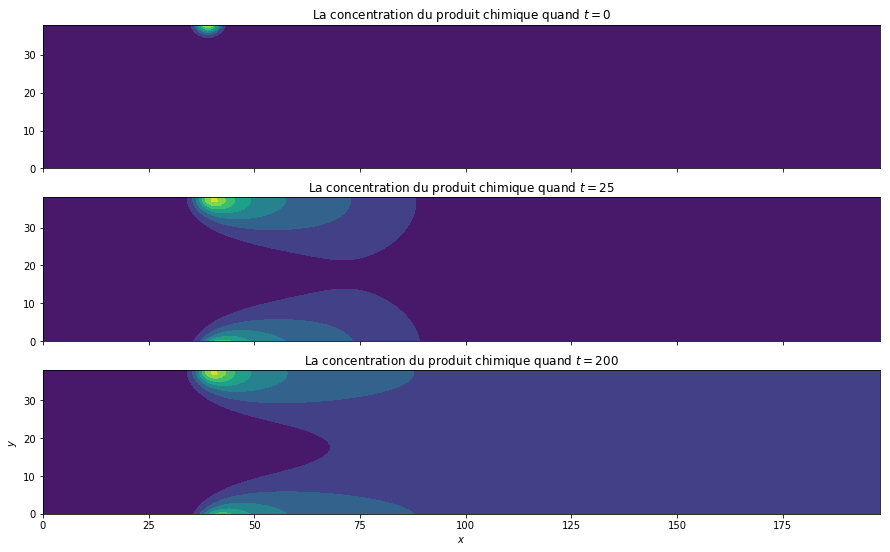

In [30]:
#figure
f, axarr = plt.subplots(3,figsize=(15, 9),sharex=True)
axarr[0].contourf(U_n_Neumann[:,1].reshape(N_x,N_y).transpose())
axarr[0].set_title("La concentration du produit chimique quand $t=0$")
axarr[1].contourf(U_n_Neumann[:,500].reshape(N_x,N_y).transpose())
axarr[1].set_title("La concentration du produit chimique quand $t=25$")
axarr[2].contourf(U_n_Neumann[:,-1].reshape(N_x,N_y).transpose())
axarr[2].set_title("La concentration du produit chimique quand $t=200$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [56]:
#Q13 simulation avec les deux vitesse proposé
def f_2D_vec(xy_vec,x0,y0,sigma):
    xy0 = np.array([x0,y0])
    xy_vec_new = xy_vec - xy0
    xy_vec_new = xy_vec_new **2
    sum_xy = xy_vec_new[:,0]+xy_vec_new[:,1]
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-(sum_xy/(2*sigma*sigma)))

#initiation
mu =  0.5
L=100
l = int(L/5)
T=25
del_x = 0.5
del_y = 0.5
del_t = 0.05
x0 = 20
y0 = l
sigma = 1.0
N_x = int(L/del_x -1)
N_y = int(l/del_y -1)
M = int(T/del_t)
U_n = np.zeros((N_x*N_y,M))
I_NN = sparse.identity(N_x*N_y)
x_vec = np.linspace(del_x, L,N_x)
y_vec = np.linspace(del_y,l,N_y)
xy_vec = np.zeros((N_x*N_y,2))
for i in range(N_x):
    for j in range(N_y):
        xy_vec[i*N_y+j,0] = (i+1)*del_x
        xy_vec[i*N_y+j,1] = (j+1)*del_y

In [57]:
#Q13
# définition des vitesse
def g(x):
    return np.exp(-x*x/10.)
def h(x,L):
    if x<L/8.:
        return g(x-L/8.)
    else:
        return g((x-L/8.)/10.)
def v(x,y,L,l):
    return np.array([1,-np.sin(2*np.pi*y/l)*np.sin(4*np.pi*x/L)])
def v1(x,y,L,l):
    if x<L/2.:
        return v(x,y,L,l)
    else:
        return v(0.,0.,L,l)
def V1(x,y,L,l):
    return (1-h(x,L)*g(y-l/2.))*v1(x,y,L,l)
def V2(x,y,L,l):
    return (1-h(x,L)*g(y-l/2.))*(1-h(x-L/2.,L)*g(y-l/2.))*v(x,y,L,l)

M_V1 = np.zeros((N_y,N_x,2))
for i in range(N_x):
    for j in range(N_y):
        M_V1[j,i,:] = V1((i+1)*del_x, (j+1)*del_y,L,l)
        
M_V2 = np.zeros((N_y,N_x,2))
for i in range(N_x):
    for j in range(N_y):
        M_V2[j,i,:] = V2((i+1)*del_x, (j+1)*del_y,L,l)

# définition des diagonales pour les matrices         
diags_V1_x = []
tmp = []
for i in range(1,N_x):
    for j in range(N_y):
        tmp.append(-M_V1[j,i,0])
diags_V1_x.append(tmp)
tmp = [0 for i in range(N_x*N_y)]
for i in range(N_y):
    tmp[i] = -M_V1[i,0,0]
    tmp[-1-i] = M_V1[i,N_x-1,0]
diags_V1_x.append(tmp)
tmp = []
for i in range(N_x-1):
    for j in range(N_y):
        tmp.append(M_V1[j,i,0])
diags_V1_x.append(tmp)

diags_V1_y = []
tmp = []
for i in range(N_x):
    for j in range(N_y):
        tmp.append(-M_V1[j,i,1])
tmp.pop(0)
diags_V1_y.append(tmp)
tmp = []
for i in range(N_x):
    for j in range(N_y):
        tmp.append(M_V1[j,i,1])
tmp.pop(-1)
diags_V1_y.append(tmp)

diags_V2_x = []
tmp = []
for i in range(1,N_x):
    for j in range(N_y):
        tmp.append(-M_V2[j,i,0])
diags_V2_x.append(tmp)
tmp = [0 for i in range(N_x*N_y)]
for i in range(N_y):
    tmp[i] = -M_V2[i,0,0]
    tmp[-1-i] = M_V2[i,N_x-1,0]
diags_V2_x.append(tmp)
tmp = []
for i in range(N_x-1):
    for j in range(N_y):
        tmp.append(M_V2[j,i,0])
diags_V2_x.append(tmp)

diags_V2_y = []
tmp = []
for i in range(N_x):
    for j in range(N_y):
        tmp.append(-M_V2[j,i,1])
tmp.pop(0)
diags_V2_y.append(tmp)
tmp = []
for i in range(N_x):
    for j in range(N_y):
        tmp.append(M_V2[j,i,1])
tmp.pop(-1)
diags_V2_y.append(tmp)


# définition des matrices creuses
K_xc_V1 = 1./(2.*del_x) * sparse.diags(diags_V1_x,[-N_y,0,N_y],shape = (N_x*N_y,N_x*N_y))
K_xc_V2 = 1./(2.*del_x) * sparse.diags(diags_V2_x,[-N_y,0,N_y],shape = (N_x*N_y,N_x*N_y))
K_yc_V1 = 1./(2.*del_y) * sparse.diags(diags_V1_y,[-1,1],shape = (N_x*N_y,N_x*N_y))
K_yc_V2 = 1./(2.*del_y) * sparse.diags(diags_V2_y,[-1,1],shape = (N_x*N_y,N_x*N_y))


diags = []
diags.append([1 for i in range(N_x*N_y-N_y)])
tmp = [-2 for i in range(N_x*N_y)]
for i in range(N_y):
    tmp[i] = -1
    tmp[-1-i] = -1
diags.append(tmp)
diags.append([1 for i in range(N_x*N_y-N_y)])
A_x_new = 1./(del_x*del_x)* sparse.diags(diags,[-N_y,0,N_y],shape= (N_x*N_y,N_x*N_y))
A_y = 1./(del_y*del_y)* sparse.diags([1,-2,1],[-1,0,1],shape = (N_x*N_y,N_x*N_y))

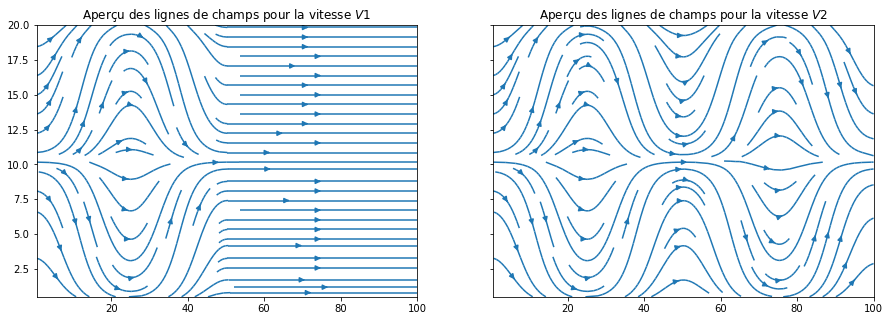

In [58]:
# visualisation de deux champs de vitesse
xx,yy=np.meshgrid(x_vec,y_vec)
f, axarr = plt.subplots(1,2,figsize= (15,5),sharey=True)
axarr[0].streamplot(xx,yy,M_V1[:,:,0],M_V1[:,:,1])
axarr[0].set_title("Aperçu des lignes de champs pour la vitesse $V1$")
axarr[1].streamplot(xx,yy,M_V2[:,:,0],M_V2[:,:,1])
axarr[1].set_title("Aperçu des lignes de champs pour la vitesse $V2$")
plt.show()

In [59]:
# calcul 
M=4000 # T = 200
U_n_V1 = np.zeros((N_x*N_y,M))
U_n_V2 = np.zeros((N_x*N_y,M))
source = f_2D_vec(xy_vec,x0,y0,sigma)
U_n_V1[:,0] = 0.
U_n_V2[:,0] = 0.
M_sps1 = sparse.csc_matrix(I_NN + del_t/2.*(K_xc_V1 + K_yc_V1) - mu*del_t/2.*(A_x_new+A_y))
M_sps2 = sparse.csc_matrix(I_NN + del_t/2.*(K_xc_V2 + K_yc_V2) - mu*del_t/2*(A_x_new+A_y))
lu_obj1 = linalg.splu(M_sps1)
lu_obj2 = linalg.splu(M_sps2)
M_n1 = I_NN - del_t/2.*(K_xc_V1 + K_yc_V1) + mu*del_t/2*(A_x_new+A_y)
M_n2 = I_NN - del_t/2.*(K_xc_V2 + K_yc_V2) + mu*del_t/2*(A_x_new+A_y)

for i in range(1,M):
    U_n_V1[:,i] = lu_obj1.solve(M_n1.dot(U_n_V1[:,i-1]) + source)
    U_n_V2[:,i] = lu_obj2.solve(M_n2.dot(U_n_V2[:,i-1]) + source)

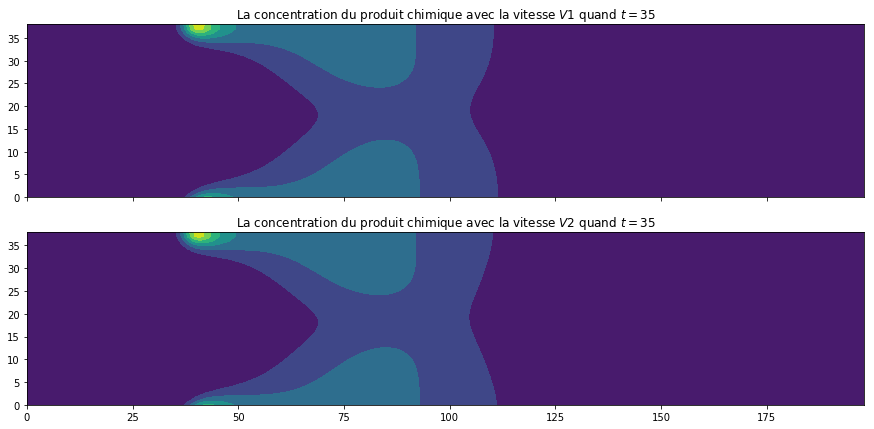

In [60]:
# visualisation
f, axarr = plt.subplots(2,figsize=(15, 7),sharex=True)
axarr[0].contourf(U_n_V1[:,700].reshape(N_x,N_y).transpose())
axarr[0].set_title('La concentration du produit chimique avec la vitesse $V1$ quand $t = 35$')
axarr[1].contourf(U_n_V2[:,700].reshape(N_x,N_y).transpose())
axarr[1].set_title('La concentration du produit chimique avec la vitesse $V2$ quand $t = 35$')
plt.show()

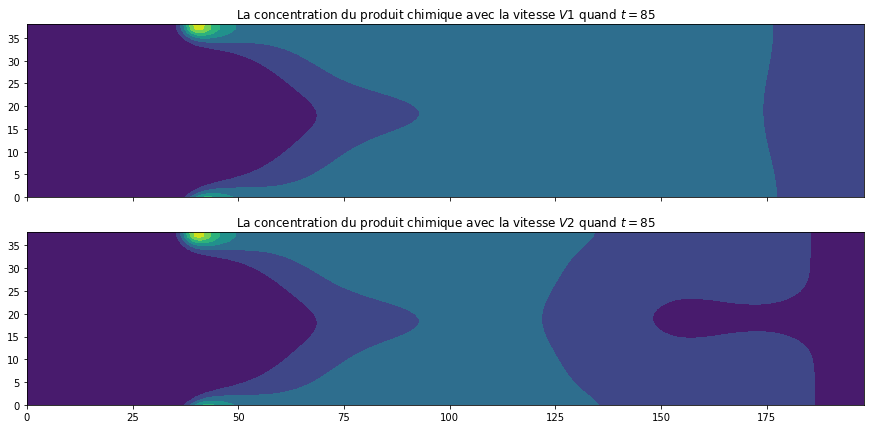

In [61]:
# visualisation
f, axarr = plt.subplots(2,figsize=(15, 7),sharex=True)
axarr[0].contourf(U_n_V1[:,1700].reshape(N_x,N_y).transpose())
axarr[0].set_title('La concentration du produit chimique avec la vitesse $V1$ quand $t = 85$')
axarr[1].contourf(U_n_V2[:,1700].reshape(N_x,N_y).transpose())
axarr[1].set_title('La concentration du produit chimique avec la vitesse $V2$ quand $t = 85$')
plt.show()